In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
prop = matplotlib.font_manager.FontProperties(fname="c:\\windows\\fonts\\nunitosans-light.ttf")
matplotlib.rcParams['font.family'] = prop.get_name()
matplotlib.rcParams['font.weight'] = 'light'
matplotlib.rcParams['axes.facecolor'] = '#fbfbfb'


In [2]:
matplotlib.rcParams['figure.dpi'] = 100

## Load results of simulations

For each simulation, we use a simple Rescorla-Wagner model generate data from normally distributed sets of parameter values (learning rate $\alpha$ and temperature $\beta$) which have a specified correlation with a third "symptom" variable. After fitting the model, we calculate the correlation between the recovered parameter values and the symptom measure.

In [3]:
result_df = pd.read_csv('notebook_results.csv')

## True correlations vs recovered correlations

### Learning rate ($\alpha$)

C:\Users\Toby\Anaconda2\envs\attention\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


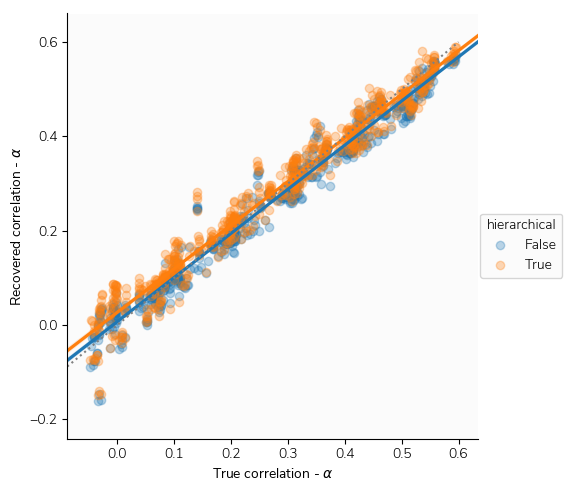

In [4]:
sns.lmplot('alpha_correlation_true', 'alpha_correlation_rec', data=result_df, hue='hierarchical', scatter_kws={'alpha': 0.3})
plt.plot(np.arange(-0.2, 0.7, 0.1), np.arange(-0.2, 0.7, 0.1), color='gray', linestyle=':')
plt.xlabel("True correlation - $\\alpha$")
plt.ylabel("Recovered correlation - $\\alpha$");

### Temperature ($\beta$)

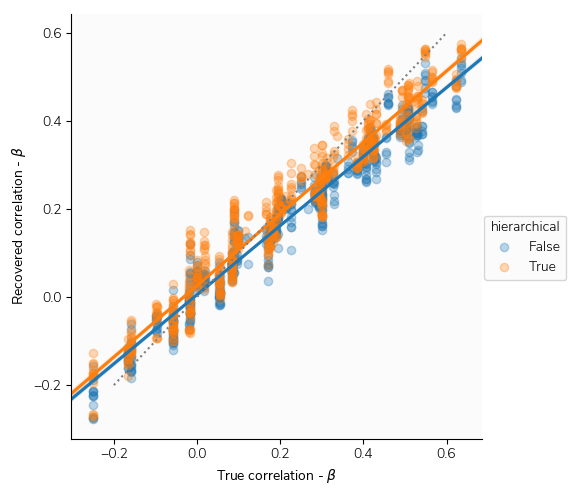

In [5]:
sns.lmplot('beta_correlation_true', 'beta_correlation_rec', data=result_df, hue='hierarchical', scatter_kws={'alpha': 0.3})
plt.plot(np.arange(-0.2, 0.7, 0.1), np.arange(-0.2, 0.7, 0.1), color='gray', linestyle=':')
plt.xlabel("True correlation - $\\beta$")
plt.ylabel("Recovered correlation - $\\beta$");

## Correlation estimation error

Calculated as the difference between true and recovered correlations

### Learning rate ($\alpha$)

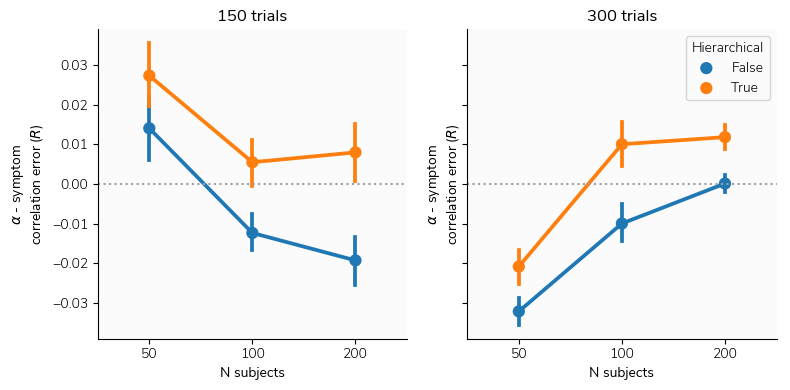

In [6]:
fplot = sns.factorplot('n_subjects', 'alpha_corr_error', col='n_trials', hue='hierarchical', 
               data=result_df, legend=False)
n_trials = [150, 300]
for n, ax in enumerate(fplot.axes[0]):
    ax.axhline(0, color='#9e9e9e', linestyle=':')
    ax.set_xlabel("N subjects")
    ax.set_ylabel("$\\alpha$ - symptom\ncorrelation error ($R$)")
    ax.set_title("{0} trials".format(n_trials[n]))
# .axhline(0)
plt.legend(loc='upper right', title='Hierarchical')
plt.tight_layout()

### Temperature ($\beta$)

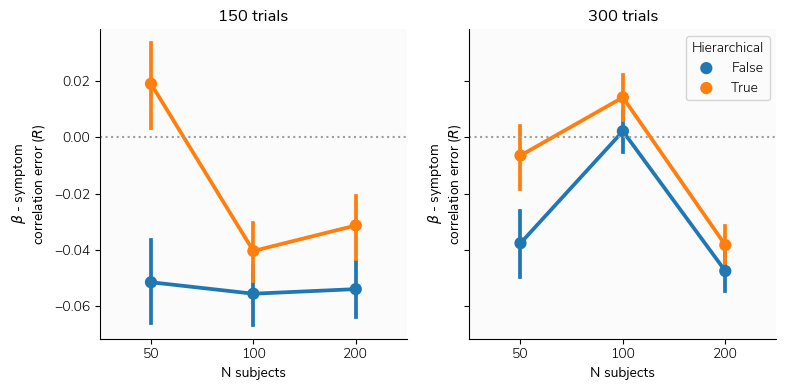

In [7]:
fplot = sns.factorplot('n_subjects', 'beta_corr_error', col='n_trials', hue='hierarchical', 
               data=result_df, legend=False)
n_trials = [150, 300]
for n, ax in enumerate(fplot.axes[0]):
    ax.axhline(0, color='#9e9e9e', linestyle=':')
    ax.set_xlabel("N subjects")
    ax.set_ylabel("$\\beta$ - symptom\ncorrelation error ($R$)")
    ax.set_title("{0} trials".format(n_trials[n]))
plt.legend(loc='upper right', title='Hierarchical')
plt.tight_layout()